<a href="https://colab.research.google.com/github/Venkat121002/Wine_Quality_Analysis/blob/main/Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload = files.upload()

Saving Wine Classification.csv to Wine Classification.csv


Reading of the file of given dataset

In [ ]:
data = pd.read_csv(r'Wine Classification.csv')

Visualization of top 5 records inside my dataset

In [ ]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


Classes of target value (quality)

In [ ]:
set(data.quality)

{3.0, 4.0, 5.0, 6.0, 7.0, 8.0, nan}

Description of the given dataset

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


To check the missing values

In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In this dataset, there are 1599 rows and only three null values. Therefore, **droping the null values is a more reasonable approach** compared to using the Median

In [ ]:
cleaned_data = data.dropna()

To check again if there are any null values

In [ ]:
cleaned_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Correlation Matrix among all features inside the dataset

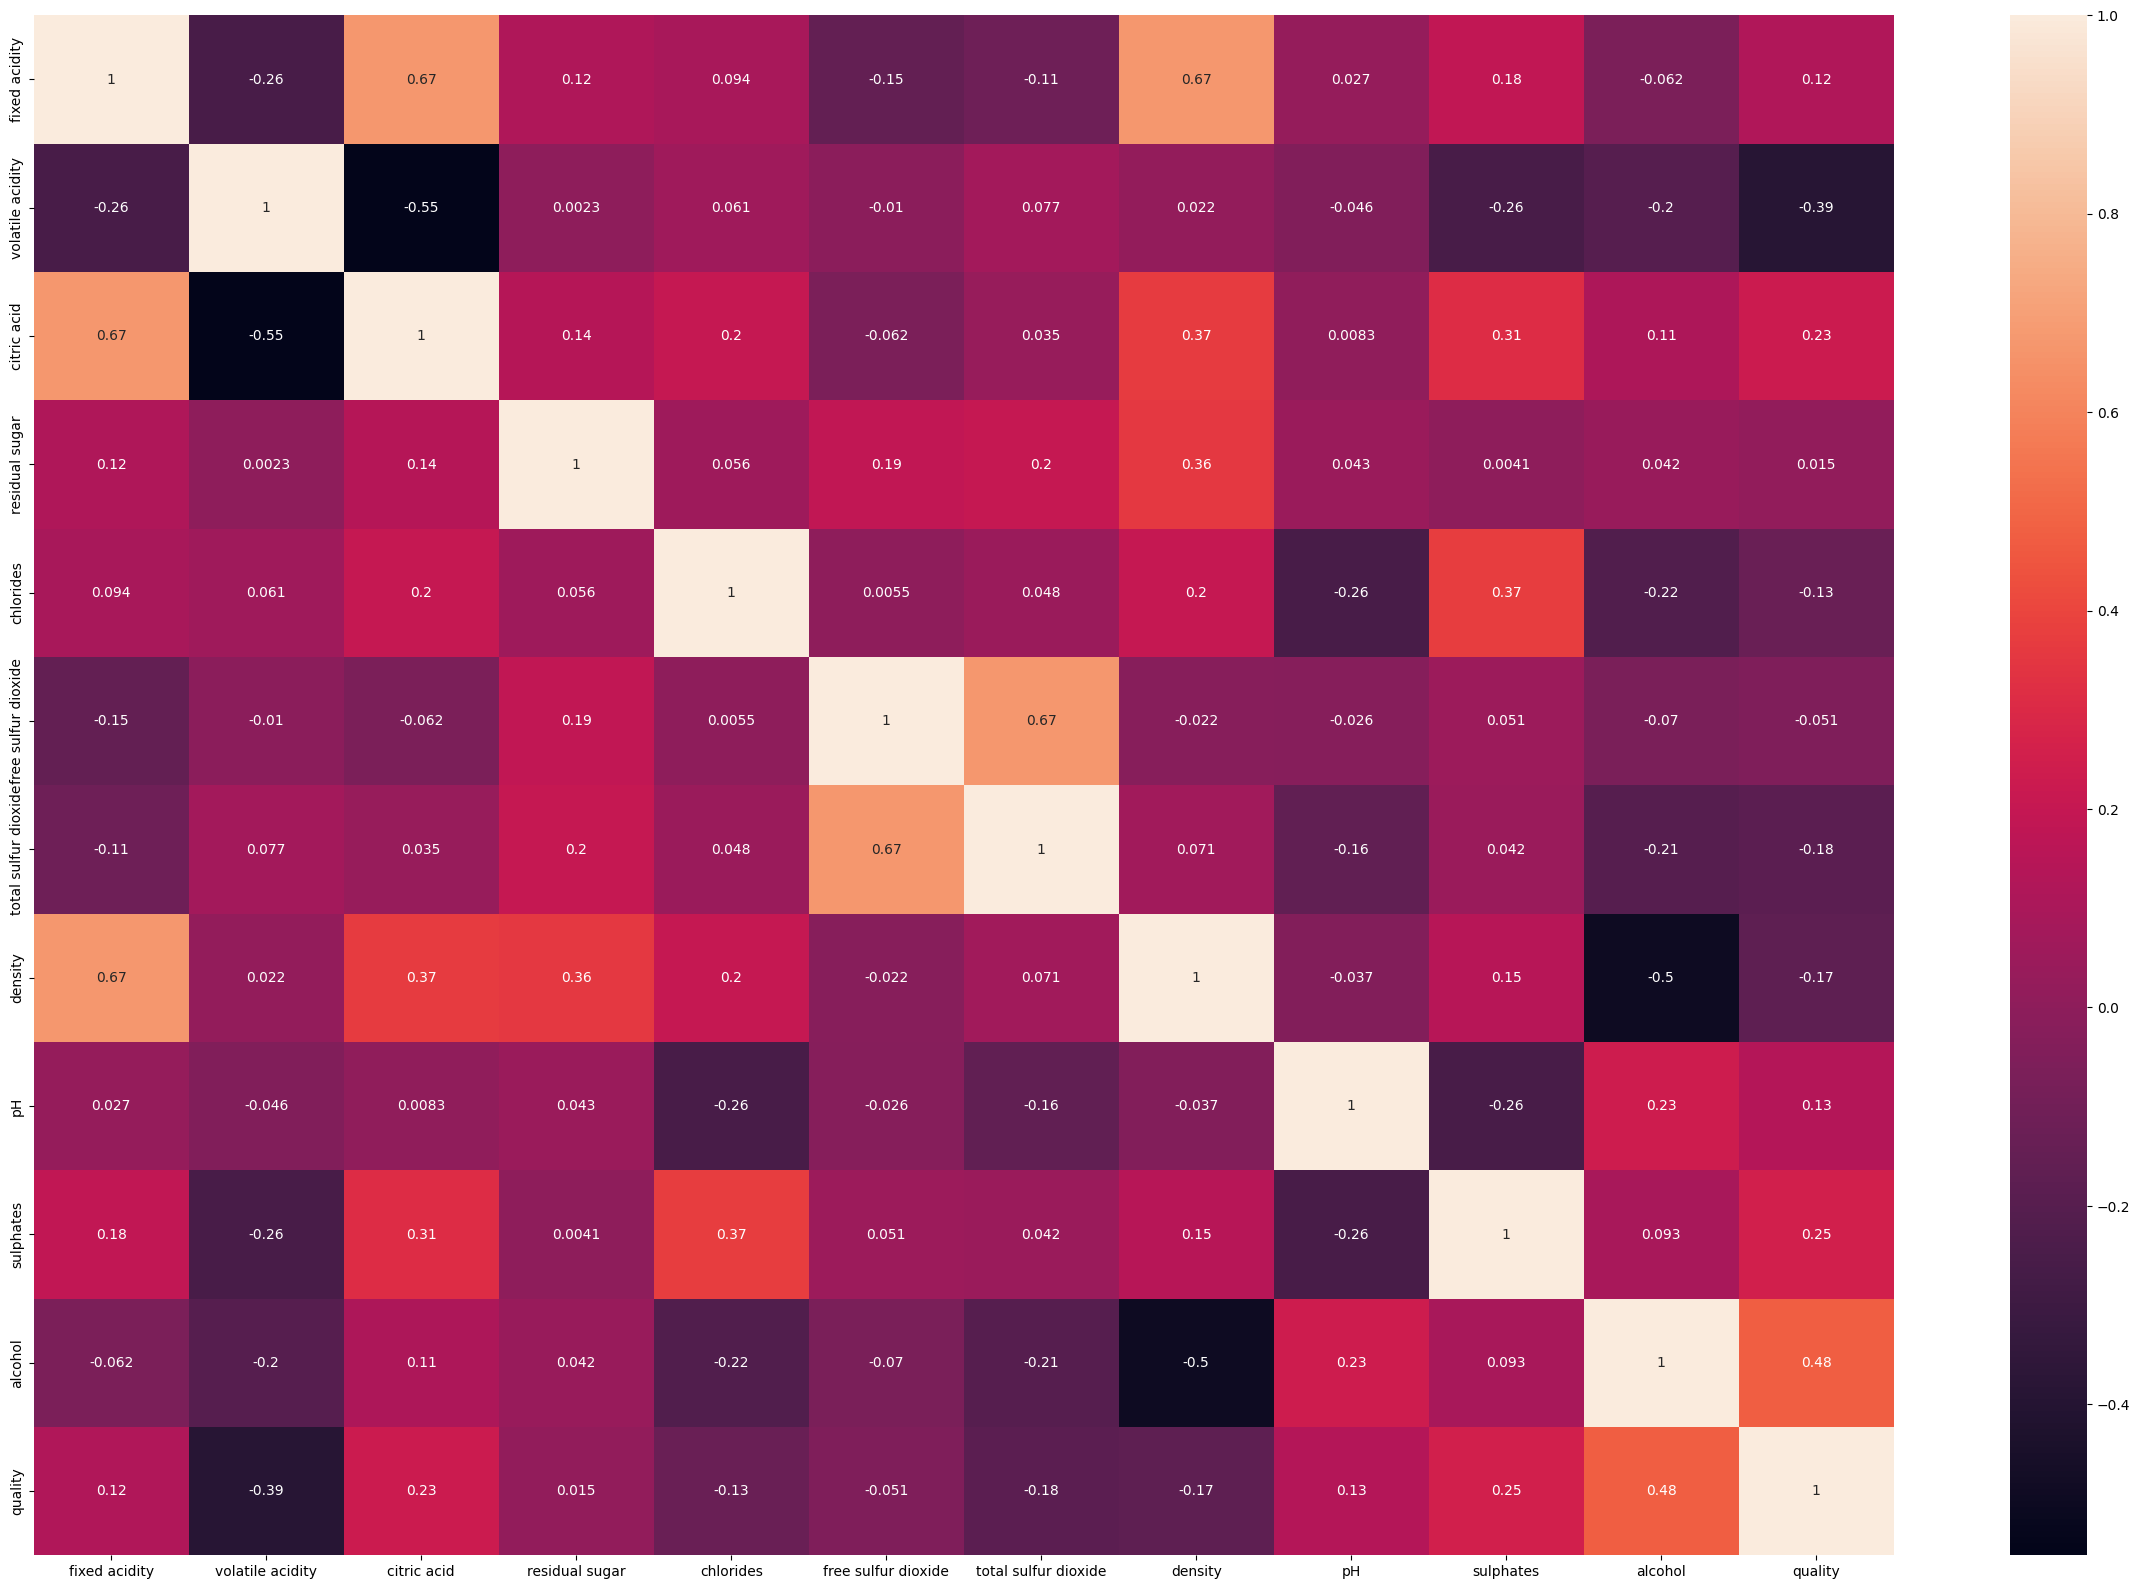

In [ ]:
plt.figure(figsize=(30,20))
corr = cleaned_data.corr()
sns.heatmap(corr, annot = True)
plt.show()

Detection of outliers using z-score

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(cleaned_data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.529042          0.962235     1.391924        0.452402   0.243923   
1          0.299365          1.967274     1.391924        0.044793   0.223247   
2          0.299365          1.297248     1.186571        0.168291   0.095837   
3          1.652891          1.382856     1.483021        0.452402   0.265158   
4          0.529042          0.962235     1.391924        0.452402   0.243923   
...             ...               ...          ...             ...        ...   
1594       1.218073          0.403880     0.981218        0.381374   0.053367   
1595       1.390331          0.124703     0.878541        0.239318   0.541212   
1596       1.160654          0.098639     0.724526        0.168291   0.243923   
1597       1.390331          0.655140     0.775865        0.381374   0.265158   
1598       1.332912          1.215349     1.020976        0.755071   0.435038   

      free sulfur dioxide  

z > 3(Threshold) - This is an outlier

In [ ]:
print(np.where(z>3))

(array([   1,    3,   12,   13,   13,   14,   14,   14,   16,   16,   16,
         18,   18,   21,   22,   26,   31,   32,   36,   37,   41,   41,
         42,   44,   45,   46,   49,   52,   53,   55,   56,   60,   78,
         80,   80,   80,   82,   82,   85,   85,   87,   87,   89,   90,
         90,   91,   91,   93,   94,   96,  105,  105,  105,  108,  108,
        109,  110,  111,  113,  114,  117,  119,  120,  123,  124,  125,
        128,  132,  133,  134,  138,  139,  140,  142,  143,  145,  145,
        149,  149,  149,  149,  158,  159,  161,  162,  163,  167,  167,
        167,  177,  178,  179,  179,  196,  223,  223,  237,  240,  241,
        255,  255,  271,  278,  288,  321,  322,  336,  337,  344,  351,
        371,  378,  388,  393,  393,  397,  397,  439,  439,  448,  456,
        464,  477,  477,  491,  512,  514,  541,  551,  551,  552,  552,
        554,  554,  565,  581,  585,  588,  592,  605,  611,  633,  636,
        646,  646,  648,  649,  649,  649,  669,  

Remove those records whose z>3(outlier)

In [ ]:
new_data = cleaned_data[(z < 3).all(axis=1)]

In [ ]:
new_data.shape

(1415, 12)

In [ ]:
cleaned_data.shape

(1596, 12)

Data splitting into features (x) and target coumn (y)

In [ ]:
from sklearn.model_selection import train_test_split
x = new_data.drop(columns = 'quality')
y = new_data['quality']

In [ ]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4


In [ ]:
y

0       5.0
2       5.0
4       5.0
5       5.0
6       5.0
       ... 
1594    5.0
1595    6.0
1596    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1415, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Data Modeling using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classificationModel = RandomForestClassifier(n_estimators = 100)

In [ ]:
rf_classificationModel.fit(x_train, y_train)

RandomForestClassifier()

Prediction of data using random forest model

In [ ]:
y_pred = rf_classificationModel.predict(x_test)

In [ ]:
y_pred

array([5., 6., 5., 5., 6., 6., 6., 6., 5., 5., 5., 5., 7., 6., 6., 5., 5.,
       5., 7., 5., 5., 5., 6., 6., 6., 6., 6., 6., 5., 6., 5., 5., 6., 6.,
       7., 6., 6., 5., 5., 5., 6., 5., 5., 5., 7., 5., 5., 5., 7., 7., 6.,
       5., 6., 5., 5., 5., 5., 7., 6., 5., 5., 5., 6., 6., 5., 5., 5., 6.,
       5., 5., 6., 6., 5., 6., 5., 6., 6., 5., 6., 5., 6., 5., 5., 5., 7.,
       5., 5., 6., 5., 6., 6., 6., 5., 7., 6., 5., 6., 6., 6., 6., 6., 6.,
       6., 6., 7., 6., 7., 7., 5., 6., 6., 5., 6., 6., 6., 5., 6., 6., 6.,
       7., 5., 7., 5., 5., 5., 5., 6., 5., 5., 6., 5., 5., 6., 6., 5., 6.,
       7., 5., 5., 5., 7., 5., 6., 5., 5., 6., 5., 7., 6., 5., 5., 6., 5.,
       5., 5., 5., 5., 6., 6., 5., 5., 6., 6., 5., 5., 6., 6., 5., 7., 6.,
       6., 6., 7., 5., 5., 5., 6., 7., 6., 6., 6., 6., 6., 6., 5., 5., 5.,
       6., 5., 6., 5., 6., 6., 5., 6., 5., 6., 5., 6., 6., 7., 5., 5., 6.,
       7., 6., 7., 5., 6., 5., 5., 6., 7., 5., 5., 6., 5., 5., 5., 6., 7.,
       6., 5., 5., 6., 6.

Data Evaluation on metrics

In [ ]:
from sklearn import metrics
print('Accuracy Score',metrics.accuracy_score(y_test, y_pred))

Accuracy Score 0.6607773851590106


Accuracy Score: 66%

1. Hyperparameter Tuning - GridSearchCV

[Text(0.6854210119390104, 0.9736842105263158, 'x[3] <= 5.55\ngini = 0.623\nsamples = 710\nvalue = [28, 489, 477, 123, 15]'),
 Text(0.41255663837744533, 0.9210526315789473, 'x[6] <= 103.5\ngini = 0.614\nsamples = 694\nvalue = [27, 484, 476, 108, 12]'),
 Text(0.3020443757192175, 0.868421052631579, 'x[10] <= 9.85\ngini = 0.618\nsamples = 653\nvalue = [27, 420, 476, 107, 12]'),
 Text(0.09482882623705409, 0.8157894736842105, 'x[7] <= 0.997\ngini = 0.486\nsamples = 248\nvalue = [12, 250, 131, 0, 1]'),
 Text(0.05293440736478711, 0.7631578947368421, 'x[4] <= 0.151\ngini = 0.264\nsamples = 65\nvalue = [3, 95, 14, 0, 0]'),
 Text(0.04833141542002301, 0.7105263157894737, 'x[1] <= 0.97\ngini = 0.253\nsamples = 64\nvalue = [3, 95, 13, 0, 0]'),
 Text(0.04372842347525892, 0.6578947368421053, 'x[0] <= 8.8\ngini = 0.226\nsamples = 63\nvalue = [1, 95, 13, 0, 0]'),
 Text(0.039125431530494824, 0.6052631578947368, 'x[9] <= 0.555\ngini = 0.201\nsamples = 62\nvalue = [1, 95, 11, 0, 0]'),
 Text(0.0184119677790

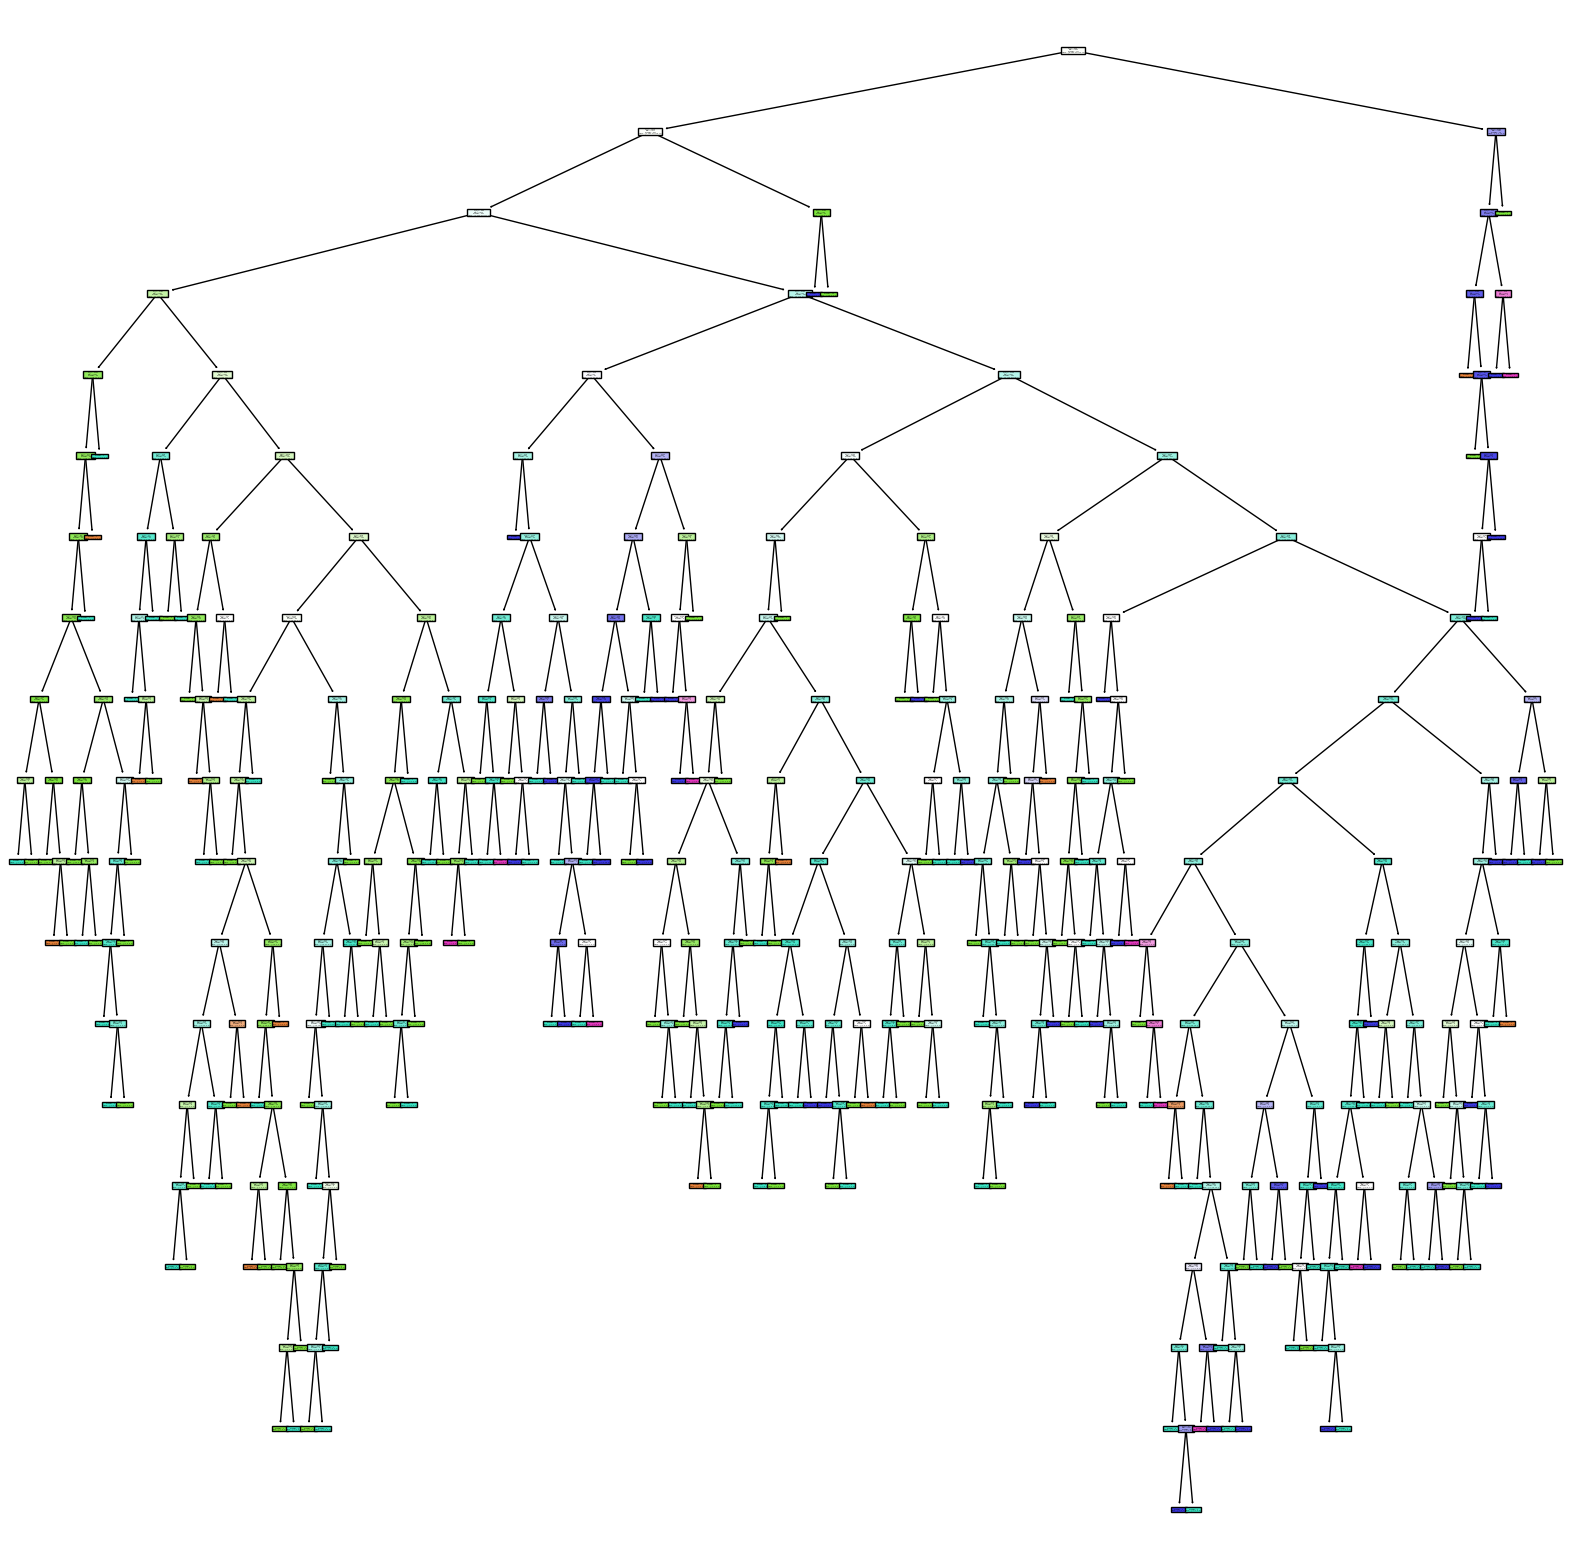

In [ ]:
plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(rf_classificationModel.estimators_[0], filled = True)